In [65]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='newtech_nonuc_elc.csv'
colfilter = ['Process','Period','PV']

In [66]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)
procs = a.Process.unique() #extract names of processes #CODE OKAY UP TO HERE
newyrs=pd.Series(range(2013,2101))
b=a.loc[a['Process'] == 'ELCCC17'].reindex(newyrs,fill_value=0)

pltdict={}

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')

2013         0.000000
2014         0.000000
2015         0.000000
2016         0.000000
2017      8760.000000
2018     20148.000000
2019     34952.400000
2020     54198.120000
2021     79217.556000
2022    111742.822800
2023    154025.669640
2024    208993.370532
2025    280451.381692
2026    314618.214052
2027    338849.241194
2028    365051.268336
2029    391089.601503
2030    408750.628645
2031    421852.159158
2032    434953.689671
2033    448055.220185
2034    461156.750698
2035    474258.281211
2036    487359.811724
2037    500461.342238
2038    513562.872751
2039    526664.403264
2040    534497.385149
2041    538384.893928
2042    544905.172773
            ...      
2071         0.000000
2072         0.000000
2073         0.000000
2074         0.000000
2075         0.000000
2076         0.000000
2077         0.000000
2078         0.000000
2079         0.000000
2080         0.000000
2081         0.000000
2082         0.000000
2083         0.000000
2084         0.000000
2085      

In [68]:
print(procs)

['ELCCC17' 'ELCCOA17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD'
 'ELCTELNG' 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWON17'
 'LNGCCS22' 'PEMFC22']


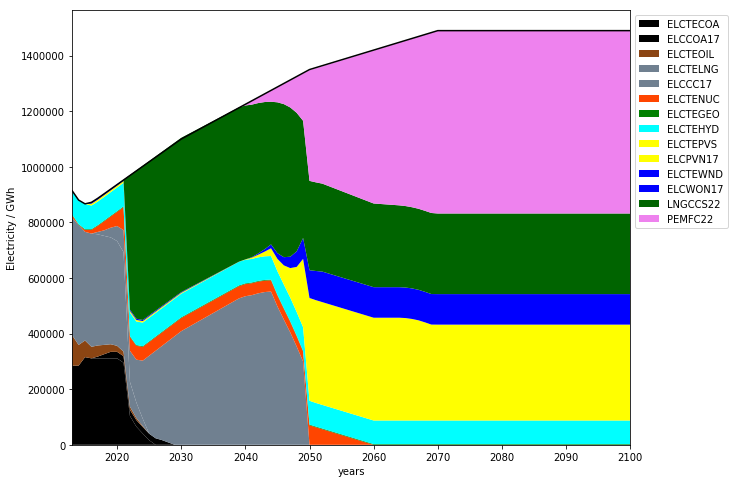

In [67]:
ordlegend=['ELCTECOA','ELCCOA17','ELCTEOIL', 'ELCTELNG','ELCCC17','ELCTENUC','ELCTEGEO','ELCTEHYD','ELCTEPVS','ELCPVN17', 
          'ELCTEWND','ELCWON17','LNGCCS22','PEMFC22']
colours = ['black', 'black','saddlebrown', 'slategray','slategray', 'orangered', 'green', 'aqua','yellow','yellow',
           'blue','blue','darkgreen','violet']
f, ax = plt.subplots(figsize=(10, 8))
ax.stackplot(years, pltdict['ELCTECOA'],pltdict['ELCCOA17'], pltdict['ELCTEOIL'], pltdict['ELCTELNG'],pltdict['ELCCC17'], 
             pltdict['ELCTENUC'],pltdict['ELCTEGEO'], pltdict['ELCTEHYD'], pltdict['ELCTEPVS'],pltdict['ELCPVN17'], 
              pltdict['ELCTEWND'],pltdict['ELCWON17'],pltdict['LNGCCS22'],pltdict['PEMFC22'], labels=ordlegend, colors=colours)
dmd=[913791,880396,866861,872251,8.87E+05,1.10E+06,1.35E+06,1.49E+06,1.49E+06]
yr=[2013,2014,2015,2016,2017,2030,2050,2070,2100]
ax.plot(yr,dmd)
ax.set_xlim((2013, 2100))
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_xlabel('years')
ax.set_ylabel('Electricity / GWh')
f.savefig('newtech_nonuc.jpg',bbox_inches='tight', dpi=300)
